In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split



from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings 
warnings.filterwarnings('ignore')


In [40]:
df=pd.read_csv("car.csv")

In [41]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [42]:
df.shape

(301, 9)

In [43]:
df["Car_Age"] = 2025 - df["Year"]  # Assuming the current year is 2025


In [44]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,9
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,10
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,16
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,8


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
 9   Car_Age        301 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 23.6+ KB


In [46]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,11.372093
std,2.891554,5.082812,8.644115,38886.883882,0.247915,2.891554
min,2003.000000,0.100000,0.320000,500.000000,0.000000,7.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,9.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,11.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,13.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,22.000000


In [47]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
Car_Age           16
dtype: int64

In [48]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Car_Age          0
dtype: int64

In [49]:
df.duplicated().sum()

np.int64(2)

In [50]:
df[df.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0,9
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0,10


In [51]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
Car_Age            int64
dtype: object

In [52]:
categorical_cols = df.select_dtypes(include=["object"]).columns
print("Categorical columns:", categorical_cols.tolist())


Categorical columns: ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']


In [53]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])  # Convert categorical values to numeric labels

In [54]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,90,2014,3.35,5.59,27000,2,0,1,0,11
1,93,2013,4.75,9.54,43000,1,0,1,0,12
2,68,2017,7.25,9.85,6900,2,0,1,0,8
3,96,2011,2.85,4.15,5200,2,0,1,0,14
4,92,2014,4.60,6.87,42450,1,0,1,0,11
...,...,...,...,...,...,...,...,...,...,...
296,69,2016,9.50,11.60,33988,1,0,1,0,9
297,66,2015,4.00,5.90,60000,2,0,1,0,10
298,69,2009,3.35,11.00,87934,2,0,1,0,16
299,69,2017,11.50,12.50,9000,1,0,1,0,8


In [55]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
IQR

Car_Name            35.0
Year                 4.0
Selling_Price        5.1
Present_Price        8.7
Kms_Driven       33767.0
Fuel_Type            0.0
Seller_Type          1.0
Transmission         0.0
Owner                0.0
Car_Age              4.0
dtype: float64

In [56]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print()
print(upper_limit)


Car_Name            -5.50
Year              2006.00
Selling_Price       -6.75
Present_Price      -11.85
Kms_Driven      -35650.50
Fuel_Type            2.00
Seller_Type         -1.50
Transmission         1.00
Owner                0.00
Car_Age              3.00
dtype: float64

Car_Name           134.50
Year              2022.00
Selling_Price       13.65
Present_Price       22.95
Kms_Driven       99417.50
Fuel_Type            2.00
Seller_Type          2.50
Transmission         1.00
Owner                0.00
Car_Age             19.00
dtype: float64


Car_Name


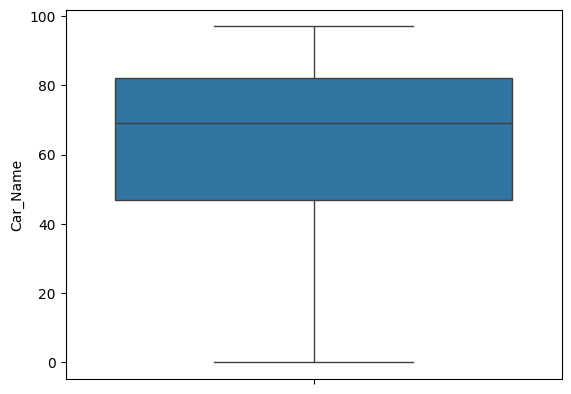

Year


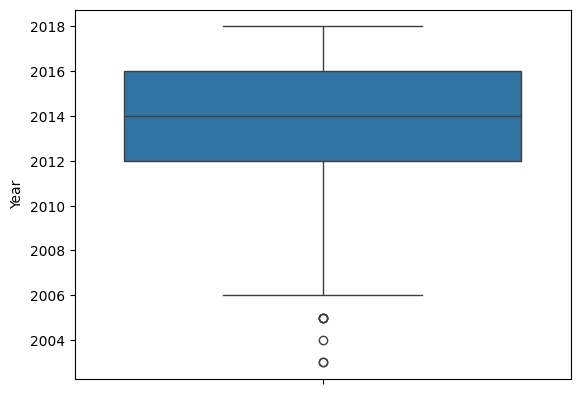

Selling_Price


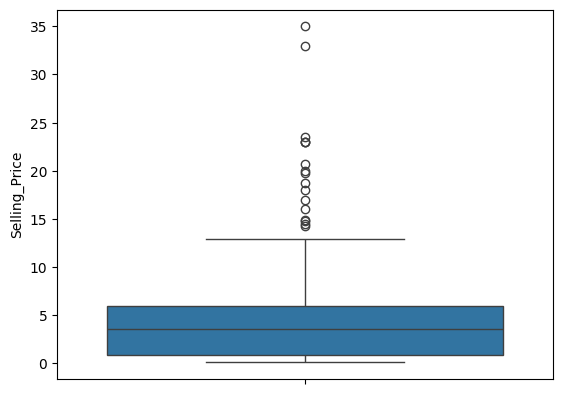

Present_Price


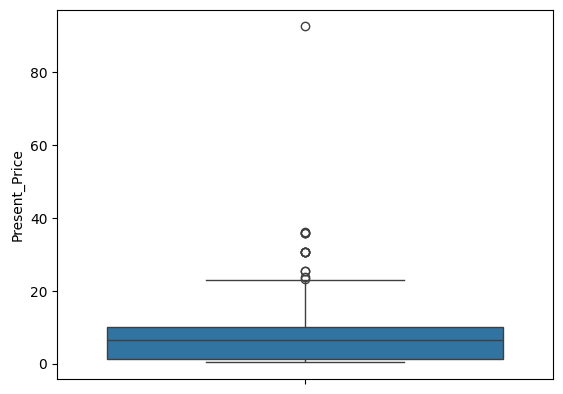

Kms_Driven


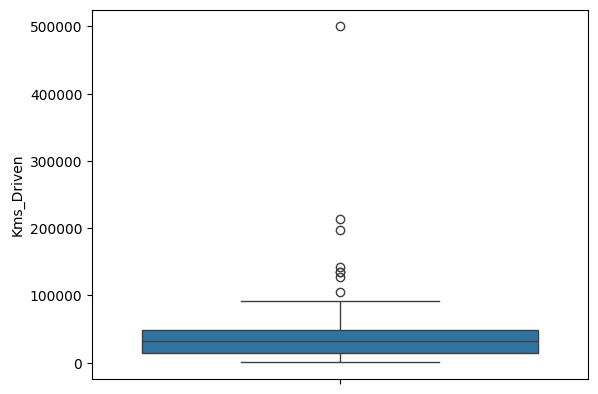

Fuel_Type


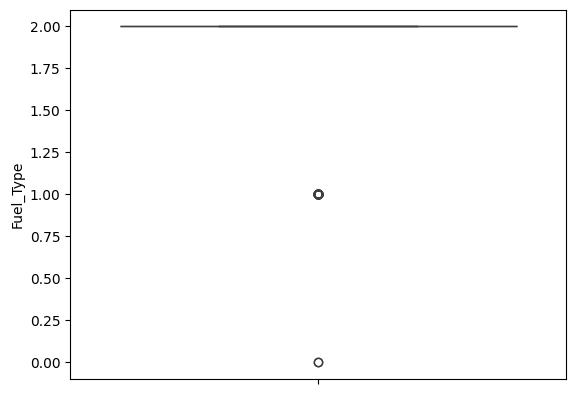

Seller_Type


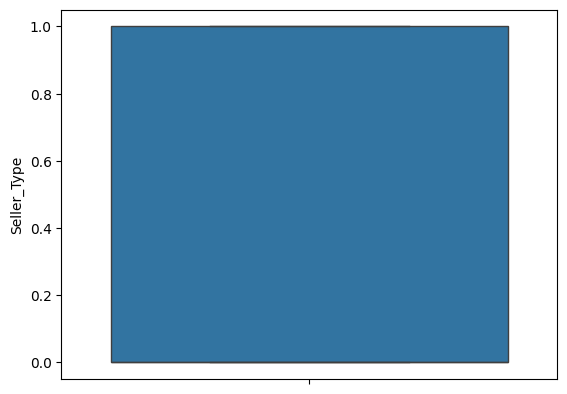

Transmission


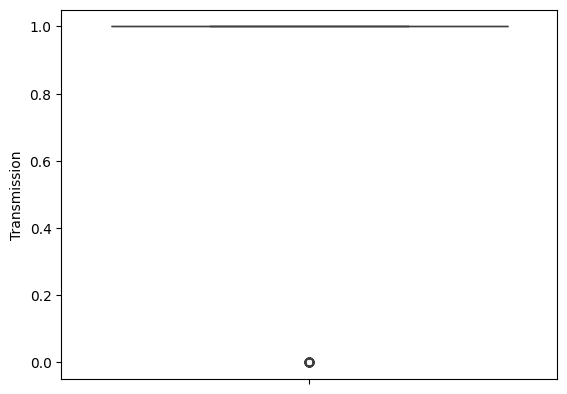

Owner


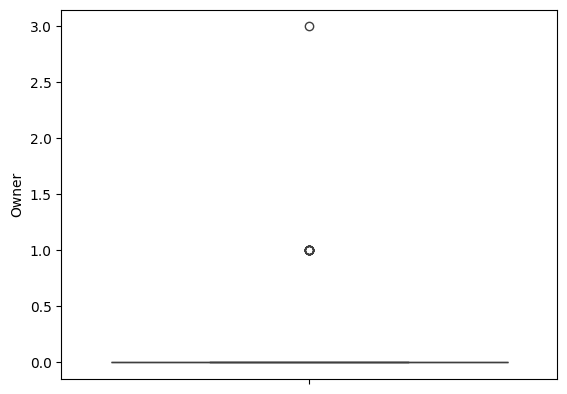

Car_Age


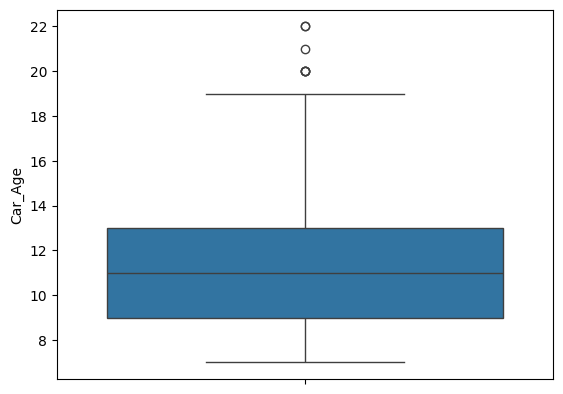

In [57]:
for i in df:
    print(i)
    sns.boxplot(df[i])
    plt.show()

In [58]:
df.shape

(301, 10)

In [59]:
data =df[~((df<lower_limit)|(df>upper_limit)).any(axis=1)]

In [60]:
data.shape

(194, 10)

In [62]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,90,2014,3.35,5.59,27000,2,0,1,0,11
2,68,2017,7.25,9.85,6900,2,0,1,0,8
3,96,2011,2.85,4.15,5200,2,0,1,0,14
6,68,2015,6.75,8.12,18796,2,0,1,0,10
10,62,2017,2.85,3.60,2135,2,0,1,0,8
...,...,...,...,...,...,...,...,...,...,...
293,69,2010,3.25,9.90,38000,2,0,1,0,15
294,64,2014,3.75,6.80,33019,2,0,1,0,11
297,66,2015,4.00,5.90,60000,2,0,1,0,10
298,69,2009,3.35,11.00,87934,2,0,1,0,16


In [63]:
df.corr()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
Car_Name,1.000000,0.017265,0.499198,0.475539,0.064453,-0.371446,-0.829718,-0.059855,-0.081192,-0.017265
Year,0.017265,1.000000,0.236141,-0.047584,-0.524342,-0.053643,-0.039896,0.000394,-0.182104,-1.000000
Selling_Price,0.499198,0.236141,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128,-0.088344,-0.236141
Present_Price,0.475539,-0.047584,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715,0.008057,0.047584
Kms_Driven,0.064453,-0.524342,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510,0.089216,0.524342
Fuel_Type,-0.371446,-0.053643,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466,0.055705,0.053643
Seller_Type,-0.829718,-0.039896,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240,0.124269,0.039896
Transmission,-0.059855,0.000394,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000,-0.050316,-0.000394
Owner,-0.081192,-0.182104,-0.088344,0.008057,0.089216,0.055705,0.124269,-0.050316,1.000000,0.182104
Car_Age,-0.017265,-1.000000,-0.236141,0.047584,0.524342,0.053643,0.039896,-0.000394,0.182104,1.000000


In [64]:
data.corr()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
Car_Name,1.000000,-0.030942,0.651882,0.620107,0.230628,NaN,-0.827146,NaN,NaN,0.030942
Year,-0.030942,1.000000,0.243170,-0.070415,-0.635461,NaN,0.072972,NaN,NaN,-1.000000
Selling_Price,0.651882,0.243170,1.000000,0.857092,0.069411,NaN,-0.769782,NaN,NaN,-0.243170
Present_Price,0.620107,-0.070415,0.857092,1.000000,0.358414,NaN,-0.769939,NaN,NaN,0.070415
Kms_Driven,0.230628,-0.635461,0.069411,0.358414,1.000000,NaN,-0.325851,NaN,NaN,0.635461
Fuel_Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seller_Type,-0.827146,0.072972,-0.769782,-0.769939,-0.325851,NaN,1.000000,NaN,NaN,-0.072972
Transmission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Car_Age,0.030942,-1.000000,-0.243170,0.070415,0.635461,NaN,-0.072972,NaN,NaN,1.000000


In [70]:
x = data[["Car_Name", "Present_Price", "Kms_Driven", "Fuel_Type", "Seller_Type", "Transmission", "Owner", "Car_Age"]]
x

,Car_Name,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,90,5.59,27000,2,0,1,0,11
2,68,9.85,6900,2,0,1,0,8
3,96,4.15,5200,2,0,1,0,14
6,68,8.12,18796,2,0,1,0,10
10,62,3.60,2135,2,0,1,0,8
...,...,...,...,...,...,...,...,...
293,69,9.90,38000,2,0,1,0,15
294,64,6.80,33019,2,0,1,0,11
297,66,5.90,60000,2,0,1,0,10
298,69,11.00,87934,2,0,1,0,16


In [65]:
y= data['Selling_Price']
y

0      3.35
2      7.25
3      2.85
6      6.75
10     2.85
       ... 
293    3.25
294    3.75
297    4.00
298    3.35
300    5.30
Name: Selling_Price, Length: 194, dtype: float64

In [71]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [72]:
x_train.shape,x_test.shape

((155, 8), (39, 8))

In [73]:
x_train

,Car_Name,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
13,76,7.710,26000,2,0,1,0,10
217,75,4.430,15000,2,0,1,0,9
199,33,0.580,53000,2,1,1,0,18
266,64,7.000,35000,2,0,1,0,11
146,20,0.787,15000,2,1,1,0,11
...,...,...,...,...,...,...,...,...
170,59,0.830,5500,2,1,1,0,13
27,92,6.490,16200,2,1,1,0,8
153,16,0.990,45000,2,1,1,0,12
280,66,5.900,14465,2,0,1,0,10


In [74]:
x_test

,Car_Name,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
220,75,4.430,38488,2,0,1,0,8
31,90,4.890,54200,2,0,1,0,14
254,69,9.900,54242,2,0,1,0,12
158,38,0.540,8600,2,1,1,0,8
129,60,0.840,5000,2,1,1,0,8
249,84,7.600,17000,2,0,1,0,9
116,46,1.470,33000,2,1,1,0,12
28,63,3.950,44542,2,0,1,0,15
180,23,0.510,60000,2,1,1,0,13
176,39,1.050,30000,2,1,1,0,14


In [75]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [76]:
print(f'Training Accuracy:{round(lr.score(x_train,y_train),2)*100}%')
print(f'Test Accuracy:{round(lr.score(x_test,y_test),2)*100}%')


Training Accuracy:87.0%
Test Accuracy:85.0%


In [77]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

In [78]:
print(f'Training Accuracy:{round(tree.score(x_train,y_train),2)*100}%')
print(f'Test Accuracy:{round(tree.score(x_test,y_test),2)*100}%')


Training Accuracy:100.0%
Test Accuracy:96.0%


In [79]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [80]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)


In [81]:
y_pred_train[:3]

array([ 5.15190975,  4.35764226, -2.12892147])

In [82]:
y_pred_test[:3]

array([4.1830688 , 2.48119554, 4.81709594])

In [83]:
import sklearn
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
 

In [84]:
def training_evaluation(actual,predicted):
    mse = mean_squared_error(actual,predicted)
    rmse= np.sqrt(mean_squared_error(actual,predicted))
    mae=mean_absolute_error(actual,predicted)
    r2=r2_score(actual,predicted)

    print(f'MSE :{mse}')
    print(f'RMSE :{rmse}')
    print(f'MAE :{mae}')
    print(f'R2_Score :{r2}')

    plt.scatter(actual,predicted,color='r')
    plt.plot([actual.min(),actual.max()],[actual.min(),actual.max()],color='k',lw=2,ls='--')
    plt.title('Best Fit Line-Training Data')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.show()

MSE :0.8831427520999037
RMSE :0.9397567515585635
MAE :0.6831935187685707
R2_Score :0.8674835312546946


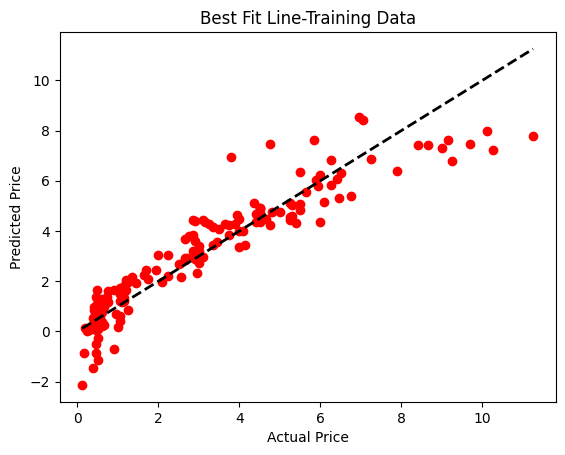

In [85]:
training_evaluation(y_train,y_pred_train)

In [87]:
def test_evaluation(actual,predicted):
    mse = mean_squared_error(actual,predicted)
    rmse= np.sqrt(mean_squared_error(actual,predicted))
    mae=mean_absolute_error(actual,predicted)
    r2=r2_score(actual,predicted)

    print(f'MSE :{mse}')
    print(f'RMSE :{rmse}')
    print(f'MAE :{mae}')
    print(f'R2_Score :{r2}')

    plt.scatter(actual,predicted,color='g')
    plt.plot([actual.min(),actual.max()],[actual.min(),actual.max()],color='k',lw=2,ls='--')
    plt.title('Best Fit Line-Test Data')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.show()

MSE :1.2099527305416682
RMSE :1.09997851367273
MAE :0.8452808219690207
R2_Score :0.8531406452764235


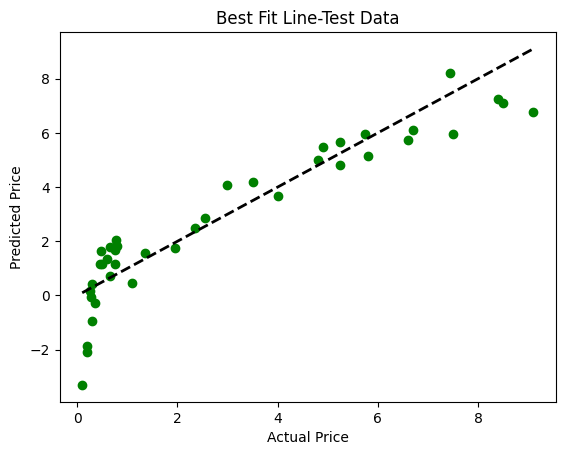

In [88]:
test_evaluation(y_test,y_pred_test)